[[ -2.24032482 -18.72268142]
 [ -9.18252856 -15.8761951 ]
 [-24.68562913  -5.21552862]
 [  6.99192817  -9.95599778]
 [ -0.68312632  30.09220829]
 [ 11.84112735  -7.64266314]
 [-19.54570657  10.88670104]
 [-14.53421961   9.43260659]
 [ 19.39628033  12.77585017]
 [-15.17583228   3.43527744]]


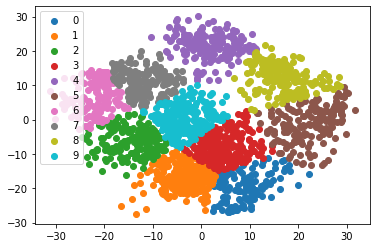

In [46]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    first = centroids
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, first
 
 
#Load Data
data = load_digits().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label, f = kmeans(df,10,1000)

print(f)
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [49]:
import math
import random

K = 10
n_iter = 100


def temp_dataset(N):
    rand_x = random.sample(range(1, 100), N)
    rand_y = random.sample(range(1, 100), N)
    dataset = []

    for i in range(N):
        dataset.append((rand_x[i], rand_y[i]))

    return dataset


def get_distance(p1, p2) -> float:
     return math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))



def get_class(centroids, points) -> list:
    assigned_class = []

    for p in points:
        distances = []
        for c in centroids:
            distances.append(get_distance(c, p))

        # Possible np.argmin()    
        assigned_class.append(distances.index(min(distances)))
        # assigned_class.append(np.argmin(distances))

    return assigned_class


def calc_centroid(k, classes, points) -> list:
    bins = list()
    for i in range(k):
        bins.append([0, 0, 0])
    new_cent = []
    
    for i, c in enumerate(classes):
        # bins[c].append(points[i])
        bins[c][0] += points[i][0]
        bins[c][1] += points[i][1]
        bins[c][2] += 1

    # print('bins', bins)
    for b in bins:
        new_cent.append([
            b[0] / b[2],
            b[1] / b[2]
            ])

    # print('cent', new_cent)
    return new_cent


# dataset = temp_dataset(50)
dataset = list(df)
c = [
    (-2.5931066, 7.1937276),
    (-2.24032116, -18.72269196),
    (18.89753556, 16.66120019),
    (-8.15381315, -18.07442863),
    (19.17948974, 11.1892292),
    (-17.34891931, 10.648122 ),
    (2.00127628, -3.66450653),
    (-13.53633091, -9.74400413),
    (-12.69469036, -16.01796297),
    (-1.29608633, -16.41995786)
]

cents = np.array(c)
# cents = random.choices(dataset, k=K)
prev_cent = cents
# Start function
for i in range(n_iter):
    assigned_centroid = get_class(cents, dataset)
    cents = calc_centroid(K, assigned_centroid, dataset)
    if cents == prev_cent:
        break
    else:
        prev_cent = cents    

# print(df)
# df = np.array(dataset)
label = np.array(assigned_centroid)
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

 
#Applying our function
label, _ = kmeans(df,K,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()